# Preparing Dataset
**Importing Dependencies**

In [ ]:
import os
from os.path import isfile
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

**Loading dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

dataset_path = '/content/drive/MyDrive/RupChitran-II I-Project/FaceExpressionDataset'


Mounted at /content/drive/


Getting image paths

In [ ]:
def getImagePaths(dataset_path):
    image_paths = []
    for root, dirs, files in os.walk(dataset_path):
      for file in files:
          image_paths.append(os.path.join(root, file))
    return image_paths

image_paths=getImagePaths(dataset_path)
print(len(image_paths))
train_paths, test_paths = train_test_split(image_paths, test_size=0.2, random_state=42)

991


Creating data frame

In [ ]:
def createDataFrame(image_paths):
    labels = [os.path.basename(os.path.dirname(path)) for path in image_paths]
    df = pd.DataFrame({'image': image_paths, 'label': labels})
    return df
train=createDataFrame(train_paths)
test=createDataFrame(test_paths)

In [ ]:
print(len(image_paths))
print(len(train_paths))
print(len(test_paths))
print(train)
print(test)

991
792
199
                                                 image    label
0    /content/drive/MyDrive/RupChitran-II I-Project...    happy
1    /content/drive/MyDrive/RupChitran-II I-Project...    happy
2    /content/drive/MyDrive/RupChitran-II I-Project...  disgust
3    /content/drive/MyDrive/RupChitran-II I-Project...    anger
4    /content/drive/MyDrive/RupChitran-II I-Project...    happy
..                                                 ...      ...
787  /content/drive/MyDrive/RupChitran-II I-Project...  disgust
788  /content/drive/MyDrive/RupChitran-II I-Project...    happy
789  /content/drive/MyDrive/RupChitran-II I-Project...  sadness
790  /content/drive/MyDrive/RupChitran-II I-Project...     fear
791  /content/drive/MyDrive/RupChitran-II I-Project...  disgust

[792 rows x 2 columns]
                                                 image     label
0    /content/drive/MyDrive/RupChitran-II I-Project...     happy
1    /content/drive/MyDrive/RupChitran-II I-Project...     happy
2

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode =  "grayscale" )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

train_features = extract_features(train['image'])
test_features = extract_features(test['image'])
x_train = train_features/255.0
x_test = test_features/255.0

  0%|          | 0/792 [00:00<?, ?it/s]

  0%|          | 0/199 [00:00<?, ?it/s]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['label'])
LabelEncoder()

y_train = le.transform(train['label'])
y_test = le.transform(test['label'])


In [ ]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [ ]:
print(x_train.shape)
print(y_train.shape)
label_order = le.classes_
print("Label order:", label_order)

(792, 48, 48, 1)
(792, 7)
Label order: ['anger' 'contempt' 'disgust' 'fear' 'happy' 'sadness' 'surprise']


Showing random image from the dataset

Random image path: /content/drive/MyDrive/RupChitran-II I-Project/FaceExpressionDataset/sadness/S130_009_00000018.png


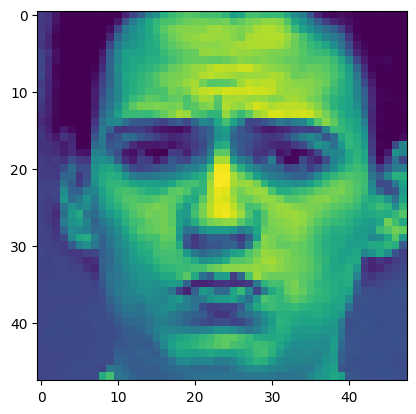

In [ ]:
def showRandomImage(image_paths):
  random_image_path = random.choice(image_paths)
  print("Random image path:", random_image_path)
  image = plt.imread(random_image_path)
  plt.imshow(image)
  plt.show()

showRandomImage(image_paths)

**Pre-process the image**

In [ ]:
"""
def preProcess(image_paths):
  input_images_list = []
  for image_path in image_paths:
    input_image=cv2.imread(image_path)
    input_images_list.append(input_image)
  images = np.array(input_images_list)
  images = images.astype('float32')
  images = images/255
  return images

images = preProcess(image_paths)
train_images= preProcess(train)
test_images = preProcess(train)

SyntaxError: incomplete input (<ipython-input-15-29bc218cb78d>, line 1)

In [ ]:
"""
print(images.shape)
random_image_np_array = random.choice(images)
print(random_image_np_array.shape)
print(random_image_np_array)

In [ ]:
"""
num_of_classes = 7
num_of_samples = images.shape[0]
print(num_of_samples)

def getLabels(dataset_path):
  Labels=[]
  for root,dirs,files in os.walk(dataset_path):
    for dir in dirs:
      Labels.append(dir)
  return Labels

Labels=getLabels(dataset_path)
print(Labels)

image_label_id = np.ones((num_of_samples,),dtype='int64')
image_label_id[0:177] = 0    # Disgust - 177 images
image_label_id[177:384] = 1  # Happy - 207 images
image_label_id[384:459] = 2  # Fear - 75 images
image_label_id[459:708] = 3  # Surprise - 249 images
image_label_id[708:853] = 4  # Anger - 145 images
image_label_id[853:937] = 5  # Sadness - 84 images
image_label_id[937:991] = 6  # Contempt - 54 images
print(image_label_id)
print(Labels[3])

**Augmentation and Preprocessing**

In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

**Build the CNN Model**

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [ ]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

In [ ]:
model_json = model.to_json()
with open("Emotion_Recognizer.json",'w') as json_file:
    json_file.write(model_json)
model.save("Emotion_Recognizer")

In [ ]:
import shutil
from google.colab import files

# Path to your folder
folder_path = '/content/Emotion_Recognizer'

# Name of the zip file
zip_file = 'Emotion_Recognizer.zip'

# Zip the folder
shutil.make_archive('Emotion_Recognizer', 'zip', folder_path)

# Download the zipped file
files.download(zip_file)

In [4]:
from tensorflow import keras



# Path to the directory containing the saved model
model_path = '/content/drive/MyDrive/RupChitran-II I-Project/EmotionRecognizerModel/Emotion_Recognizer'

# Load the model
model = keras.models.load_model(model_path)

# Print model summary to confirm it has been loaded correctly
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 23, 23, 128)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 23, 23, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 10, 10, 256)      

In [6]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

def ef(image):
    img = load_img(image,color_mode =  "grayscale",target_size=(48, 48) )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

label = ['anger', 'contempt', 'disgust' ,'fear', 'happy', 'sadness', 'surprise']


image = '/content/drive/MyDrive/RupChitran-II I-Project/x.png'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of angry
1/1 [==============================] - 0s 184ms/step
model prediction is  surprise
